## Import packages

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

## Read Data from csv files

In [3]:
bill_amt = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
clinical_data.rename(columns = {'id':'patient_id'},inplace=True)
clinical_data.replace(['Yes','No'],[1,0],inplace=True)

demo_data = pd.read_csv('demographics.csv')
demo_data.replace(['f','m'],['Female','Male'],inplace=True)
demo_data.replace(['India','chinese'],['Indian','Chinese'],inplace=True)

## Join Dataframes 

In [4]:
df = pd.merge(bill_amt, bill_id, how = 'right', left_on = 'bill_id', right_on = 'bill_id')
df = df.groupby(['patient_id','date_of_admission']).agg({'amount':np.sum}).reset_index()
df1 = pd.merge(clinical_data, demo_data, how = 'left', left_on = ['patient_id'], right_on = ['patient_id'])
df2 = pd.merge(df,df1, how = 'right', left_on = ['patient_id', 'date_of_admission'], right_on = ['patient_id','date_of_admission'])

## Convert date columns to DateTime format and handle missing data values

In [5]:
df2['date_of_discharge'] = pd.to_datetime(df2['date_of_discharge'])
df2['date_of_admission'] = pd.to_datetime(df2['date_of_admission'])
df2['date_of_birth'] = pd.to_datetime(df2['date_of_birth'])
df2['days_in_hospital'] = pd.to_datetime(df2['date_of_discharge']).sub(pd.to_datetime(df2['date_of_admission']),axis = 0).dt.days
df2.fillna(0, inplace=True)

In [6]:
med_hist = (['medical_history_1', 'medical_history_2', 'medical_history_3',
             'medical_history_4', 'medical_history_5', 'medical_history_6',
             'medical_history_7'])
no_patient_mh = []
avg_bill_amt = []
avg_no_days_spent = []
for i,hist in enumerate(med_hist):
    print(i,hist)
    patient_mh1 = df2[df2[hist] == 1]
    no_patient = len(patient_mh1['patient_id'])
    avg_bill = np.sum(patient_mh1['amount'])/no_patient
    avg_no_days = np.sum(patient_mh1['days_in_hospital'])/no_patient
    no_patient_mh.append(no_patient)
    avg_bill_amt.append(avg_bill)
    avg_no_days_spent.append(avg_no_days)

0 medical_history_1
1 medical_history_2
2 medical_history_3
3 medical_history_4
4 medical_history_5
5 medical_history_6
6 medical_history_7


In [7]:
#y_pos = np.arange(len(med_hist))
#figure1 = plt.figure()
#plt.bar(y_pos,avg_bill_amt, align='center', alpha=0.5)
#plt.xticks(y_pos,list(range(1,8)))
#plt.ylabel('Average number of days spent per patient')
#plt.xlabel('Type of medical history')
#plt.title('Cost as a factor of Average number of days per patient spent in hospital for type of medical history') 


#figure2 = plt.figure()
#plt.bar(y_pos,no_patient_mh, align='center', alpha=0.5)
#plt.xticks(y_pos,list(range(1,8)))
##plt.ylabel('Total number of Patients')
#plt.xlabel('Type of medical history')
#plt.title('Number of Patients admitted for type of medical historyCost as a factor of Average number of days per patient spent in hospital for type of medical history') 
#plt.show()

<IPython.core.display.Javascript object>


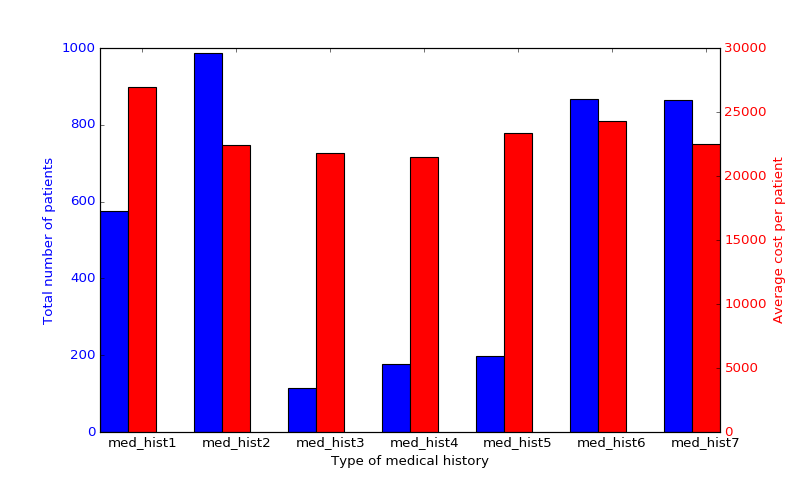

In [49]:

x_labels=['med_hist1', 'med_hist2', 'med_hist3','med_hist4','med_hist5','med_hist6','med_hist7']
  
fig = plt.figure(figsize=(10,6)) # Create matplotlib figure
width = 0.3
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(len(x_labels)) ,no_patient_mh,color='b',width = width, align='center')
ax1.set_ylabel('Total number of patients',color='b')
ax1.set_xlabel('Type of medical history')
ax1.set_xticks(np.arange(len(x_labels))+width)
ax1.set_xticklabels(x_labels)
ax2 = ax1.twinx()
ax2.bar(np.arange(len(x_labels))+width,avg_bill_amt,color='r',width = width, align='center')
ax2.set_ylabel('Average cost per patient', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('med_history_chart.png')

## Create Age column from DOB data and create age groups 


In [34]:
age_group = ['24-34','35-44','45-54','55-64','>65']
def age_group_fun(dl):
    if dl > 64: return 'age_group5'
    elif 54 < dl <= 64: return 'age_group4'
    elif 44 < dl <= 54: return 'age_group3'
    elif 34 < dl <= 44: return 'age_group2'
    elif 24 < dl <= 34: return 'age_group1'
    else: return 'None'
df2['age'] = (pd.to_datetime('today').year)-(df2['date_of_birth'].dt.year)
df2['age_group'] = df2['age'].map(age_group_fun)

## Age of the patients as the driver of the cost

In [35]:
no_pat_group = df2.groupby(['age_group']).size()
total_cost_agegrp = df2.groupby(['age_group']).agg({'amount':np.sum})
avg_cost = np.divide(total_cost_agegrp.amount,no_pat_group)

<IPython.core.display.Javascript object>


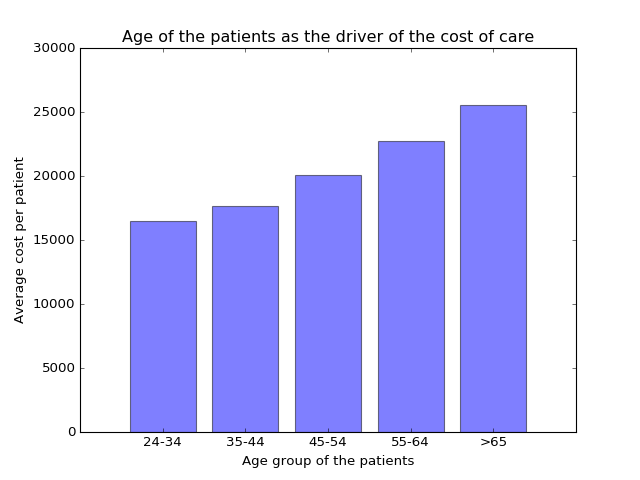

<IPython.core.display.Javascript object>


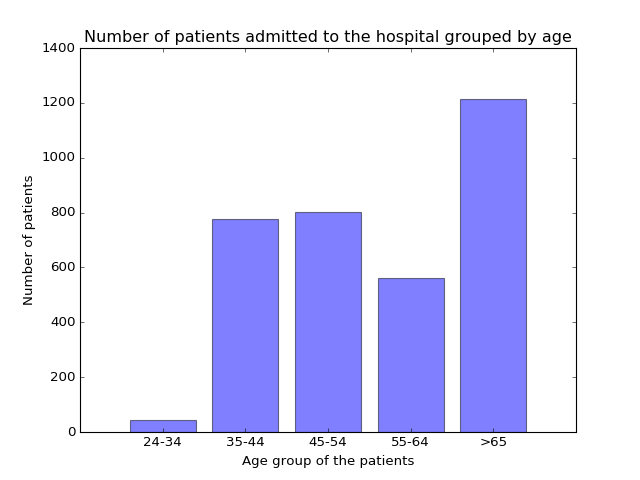

In [39]:
figure2 = plt.figure()
plt.bar(np.arange(len(age_group)),avg_cost, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_group)),age_group)
plt.ylabel('Average cost per patient')
plt.xlabel('Age group of the patients')
plt.title('Age of the patients as the driver of the cost of care')
plt.savefig('patient_age_chart.png')
figure3 = plt.figure()
plt.bar(np.arange(len(age_group)),no_pat_group, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_group)),age_group)
plt.ylabel('Number of patients')
plt.xlabel('Age group of the patients')
plt.title('Number of patients admitted to the hospital grouped by age')
plt.savefig('age_cost_chart.png')

## Preop Medication as the driver of the cost

In [41]:
preop_med = (['preop_medication_1', 'preop_medication_2',
              'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
              'preop_medication_6'])
no_patient_med = []
avg_bill_med = []
for i,hist in enumerate(preop_med):
    #print(i,hist)
    patient_mh1 = df2[df2[hist] == 1]
    no_patient = len(patient_mh1['patient_id'])
    avg_bill = np.sum(patient_mh1['amount'])/no_patient
    #avg_no_days = np.sum(patient_mh1['days_in_hospital'])/no_patient
    no_patient_med.append(no_patient)
    avg_bill_med.append(avg_bill)

<IPython.core.display.Javascript object>


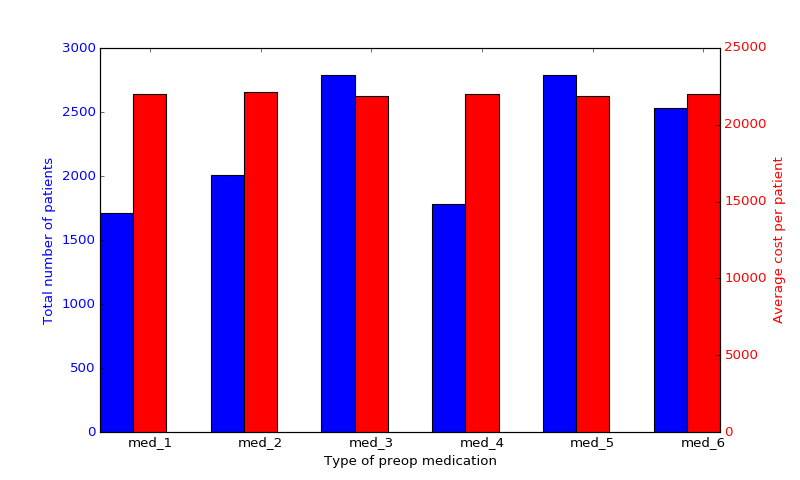

In [42]:
x_labels=['med_1', 'med_2', 'med_3','med_4','med_5','med_6']

fig = plt.figure(figsize=(10,6)) # Create matplotlib figure
width = 0.3
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(len(x_labels)) ,no_patient_med,color='b',width = width, align='center')
ax1.set_ylabel('Total number of patients',color='b')
ax1.set_xlabel('Type of preop medication')
ax1.set_xticks(np.arange(len(x_labels))+width)
ax1.set_xticklabels(x_labels)
ax2 = ax1.twinx()
ax2.bar(np.arange(len(x_labels))+width,avg_bill_med,color='r',width = width, align='center')
ax2.set_ylabel('Average cost per patient', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.savefig('preop_med_chart.png')

In [43]:
gender = ['Male', 'Female']
no_pat_gender = []
avg_bill_gender = []
for i,hist in enumerate(gender):
    #print(i,hist)
    patient_mh1 = df2[df2['gender'] == hist]
    no_patient = len(patient_mh1['patient_id'])
    avg_bill = np.sum(patient_mh1['amount'])/no_patient
    #avg_no_days = np.sum(patient_mh1['days_in_hospital'])/no_patient
    no_pat_gender.append(no_patient)
    avg_bill_gender.append(avg_bill)

<IPython.core.display.Javascript object>


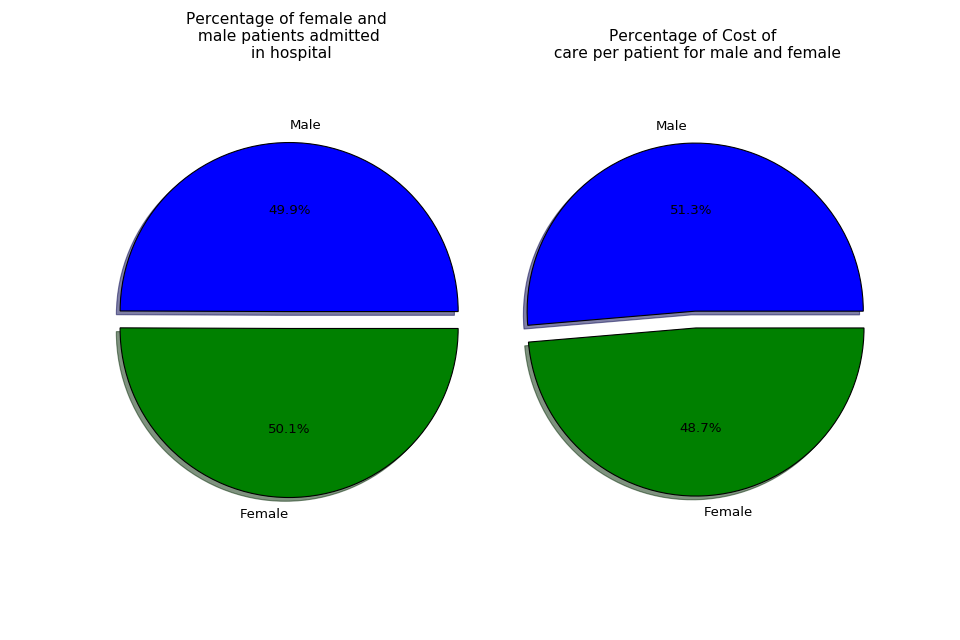

In [46]:
labels = gender
size_patient_gender =  (no_pat_gender/np.sum(no_pat_gender))*360
size_bill_gender = (avg_bill_gender/np.sum(avg_bill_gender))*360
explode = (0, 0.1)  # "explode" 

fig4 = plt.figure(figsize = (12,8))
#2 rows 2 cols
#first row, first col
ax0 = plt.subplot2grid((1,2),(0,0))
ax0.pie(size_patient_gender, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of female and \n male patients admitted \n in hospital',fontsize="14")
ax1 = plt.subplot2grid((1,2),(0,1))
ax1.pie(size_bill_gender, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Cost of \n care per patient for male and female',fontsize="14")

plt.show()
plt.savefig('gender_cost_chart.png')

In [47]:
race = ['Chinese', 'Indian', 'Malay', 'Others']
no_pat_race = []
avg_bill_race = []
for i,hist in enumerate(race):
    #print(i,hist)
    patient_mh1 = df2[df2['race'] == hist]
    no_patient = len(patient_mh1['patient_id'])
    avg_bill = np.sum(patient_mh1['amount'])/no_patient
    #avg_no_days = np.sum(patient_mh1['days_in_hospital'])/no_patient
    no_pat_race.append(no_patient)
    avg_bill_race.append(avg_bill)

<IPython.core.display.Javascript object>


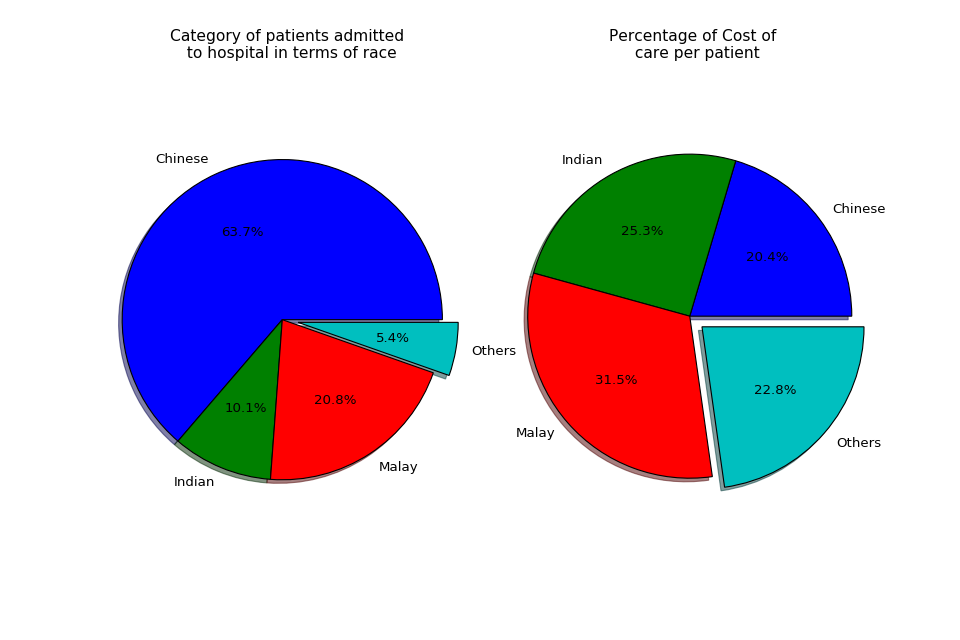

In [48]:
labels = race
size_patient_race =  (no_pat_race/np.sum(no_pat_race))*360
size_bill_race = (avg_bill_race/np.sum(avg_bill_race))*360
explode = (0, 0,0,0.1)  # "explode" 

fig4 = plt.figure(figsize = (12,8))
#2 rows 2 cols
#first row, first col
ax0 = plt.subplot2grid((1,2),(0,0))
ax0.pie(size_patient_race, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Category of patients admitted \n to hospital in terms of race',fontsize="14")
ax1 = plt.subplot2grid((1,2),(0,1))
ax1.pie(size_bill_race, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Cost of \n care per patient',fontsize="14")

plt.show()
plt.savefig('race_cost_chart.png')